In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns
from math import sqrt

# import sys
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams.update({
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "white",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white",
    "font.size": 25})
sampleSize = 10000
# numberOfSteps = 1000
k = 0.1

#### powerlaw based on related paper
Zmin = 0.001 

Zmax = 16744*Pi , Pi (8 Feb 2022) = 0.0001 then Zmax = 1.674

A = Zmax / (Zmax - Zmin) = 1

E = A * Zmin * ln(Zmax/Zmin) = 0.0074 bit

then:
Draws a random value according to the power-law distribution, with:
* CDF: F(z) = Zmax/z - (Z - Zmin)/(Zmax - Zmin) for z>=Zmin and z <= Zmax
Uses inverse random sampling: https://en.wikipedia.org/wiki/Inverse_transform_sampling

The inverse CDF is:  F^{-1}(u) = Zmax * Zmin / (Zmax - u * (Zmax - Zmin)))


1.022299414211168
1.9061419505472512


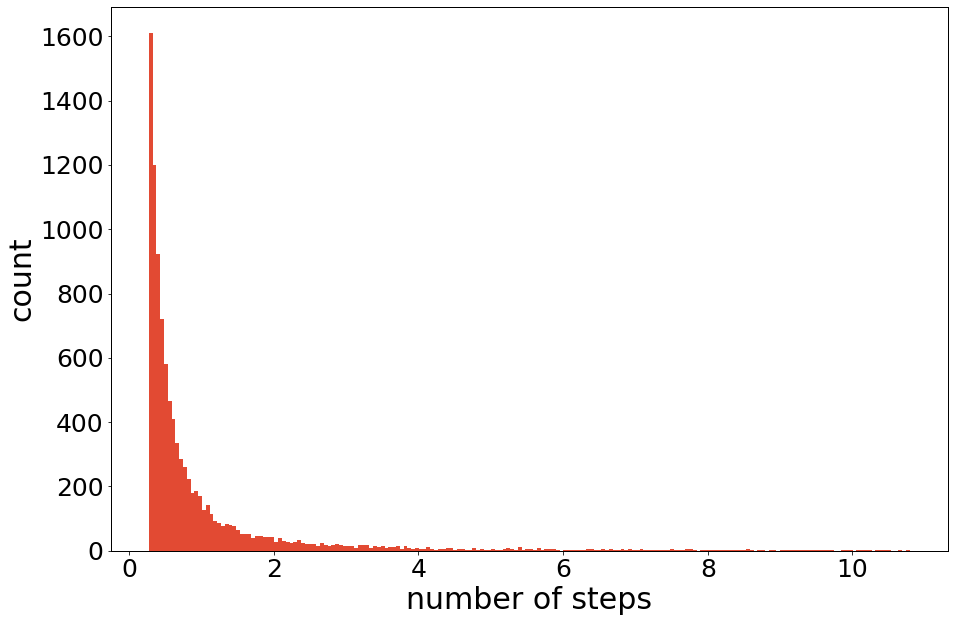

In [111]:
temp = []
Zmax = 0.04
Zmin = 0.001
for i in range(10000):
    temp.append(((Zmax * Zmin) / (Zmax - np.random.uniform(0,1,1) * (Zmax - Zmin)))[0] / 0.0037)

print(np.average(temp))
print(np.var(temp))
plt.hist(temp, bins=200)
plt.xlabel('number of steps')
plt.ylabel('count')
plt.show()
# print(temp)


In [2]:
def RandomWalker_fixStepSize(a, b):
    X = 0
    step = 0
    while(True):
        x_i  = random.choice([-1, 1])
        X += x_i
        step += 1
        if X >= a or X <= -b:
            return step

def RandomWalker_varStepSize(a, b):
    X = 0
    step = 0
    while(True):
        x_i  = random.choice([-1, 1]) * np.random.normal(1, 0.3, 1)[0]
        X += x_i
        step += 1
        if X >= a or X <= -b:
            return step

def RandomWalker_varStepSize_powerLaw(a, b):
    X = 0
    Zmax = 0.04
    Zmin = 0.001
    step = 0
    while(True):
        x_i  = random.choice([-1, 1]) * (((Zmax * Zmin) / (Zmax - np.random.uniform(0,1,1) * (Zmax - Zmin)))[0] / 0.0037)
        X += x_i
        step += 1
        if X >= a or X <= -b:
            return step

def RandomWalker_failiarCounter(a, b, numberOfSteps):
    X = 0
    failiar = [0 for i in range(numberOfSteps)]
    # print(len(failiar))
    for step in range(numberOfSteps):
        x_i  = random.choice([-1, 1])
        X += x_i
        if X > a or X < -b:
            failiar[step] = 1
            X -= x_i
        # step += 1
    return failiar

def RandomWalker_failiarCounter_p(a, b, numberOfSteps, prob):
    X = 0
    failiar = 0
    failFlag = False
    stepAfetrFail = 0
    for step in range(numberOfSteps):
        x_i  = np.random.choice([-1, 1], p = [prob, 1 - prob])
        X += x_i
        if X > a or X < -b:
            if failFlag is False:
                failFlag = True
            failiar += 1
            X -= x_i

        if failFlag is True:
            stepAfetrFail += 1

    if stepAfetrFail == 0:
        return 0
    
    return (failiar / stepAfetrFail)

In [3]:
numberOfSteps = 5000
sampleSize = 500

failRate = [[0 for j in range(5)] for i in range(5)]
cap = [10, 15, 20, 25, 30]
prob = [0.3, 0.35, 0.4, 0.45, 0.5]

for c in range(5):
    for p in range(5):
        failiar = []
        for i in range(sampleSize):
            failiar.append(RandomWalker_failiarCounter_p(cap[c], cap[c], numberOfSteps, prob[p]))

        failRate[c][p] = np.mean(failiar)

In [4]:
data = []
for c in range(5):
    for p in range(5):
        data.append([cap[c], prob[p], failRate[c][p]])
        
dataFrame = pd.DataFrame(data, columns=['capacity', 'probability', 'failRate'])
corr = dataFrame.corr()
# corr.style.background_gradient(cmap='coolwarm')
plt.matshow(corr)
# plt.matshow(dataFrame.corr())
# plt.show()
print(failRate)
# dataFrame

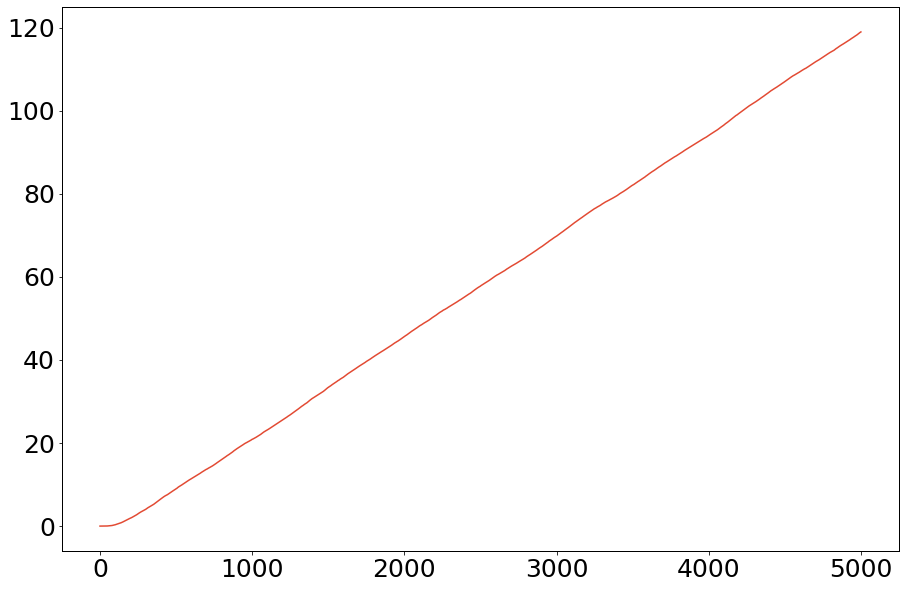

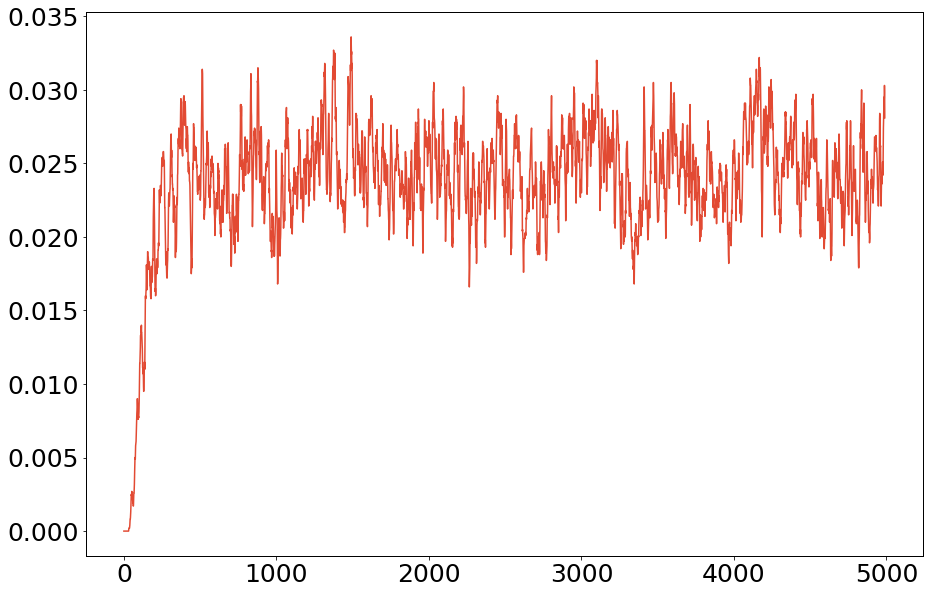

In [6]:
numberOfSteps = 5000
sampleSize = 1000
failiar = []
for i in range(sampleSize):
    failiar.append(RandomWalker_failiarCounter(20, 20, numberOfSteps))
failiar = np.mean(failiar, axis=0)
# len(failiar)
deltaStep = 10
acc = [sum(failiar[:i + 1]) for i in range(numberOfSteps)]
plt.plot([i for i in range(numberOfSteps)], acc)
plt.show()

# failiar_extended = [0 in range(deltaStep)] + failiar
# acc_fail_rate = [sum(failiar_extended[i - deltaStep : i + 1]) / (deltaStep) for i in range(deltaStep, numberOfSteps + deltaStep)]
# plt.plot([i for i in range(numberOfSteps)], acc_fail_rate)
# print(len(acc_fail_rate))
acc = acc + [0 for i in range(deltaStep)]
acc_fail_rate = [((acc[i] - acc[i - deltaStep]) / deltaStep) for i in range(0, numberOfSteps - deltaStep)]
plt.plot([i for i in range(numberOfSteps - deltaStep)], acc_fail_rate)
plt.show()

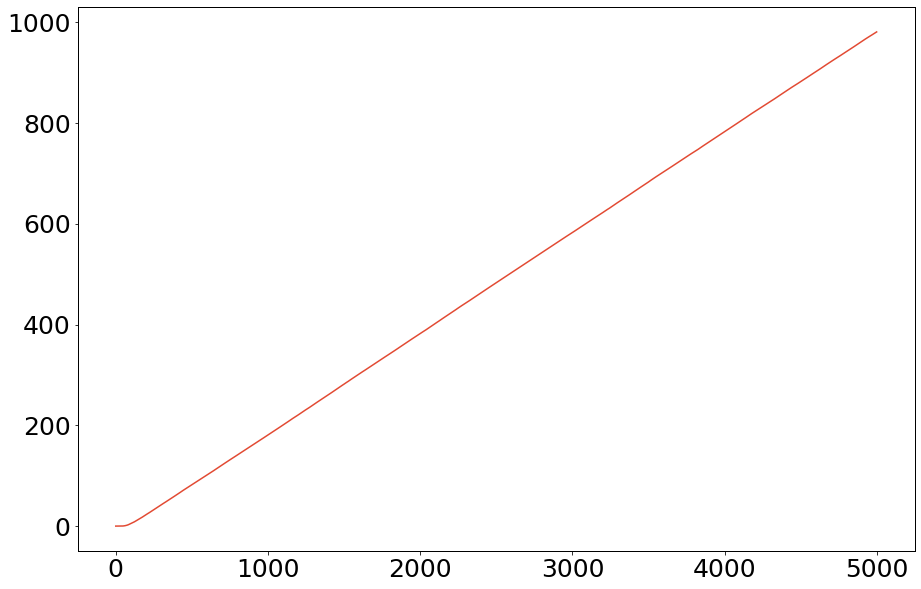

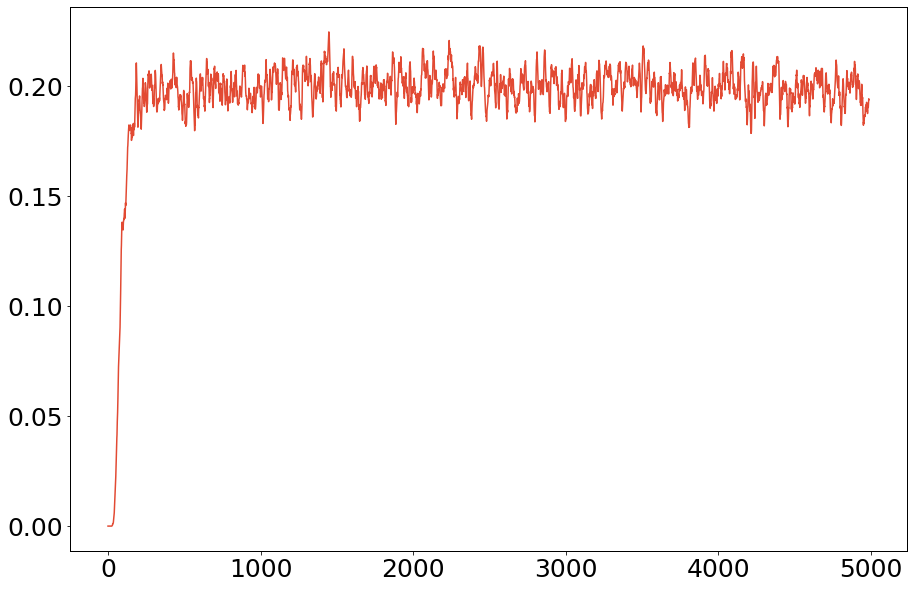

In [22]:
numberOfSteps = 5000
sampleSize = 1000
failiar_40 = []
for i in range(sampleSize):
    failiar_40.append(RandomWalker_failiarCounter_p(20, 20, numberOfSteps, 0.4))
failiar_40 = np.mean(failiar_40, axis=0)

deltaStep = 10
acc = [sum(failiar_40[:i + 1]) for i in range(numberOfSteps)]
plt.plot([i for i in range(numberOfSteps)], acc)
plt.show()

acc = acc + [0 for i in range(deltaStep)]
acc_fail_rate = [((acc[i] - acc[i - deltaStep]) / deltaStep) for i in range(0, numberOfSteps - deltaStep)]
plt.plot([i for i in range(numberOfSteps - deltaStep)], acc_fail_rate)
plt.show()

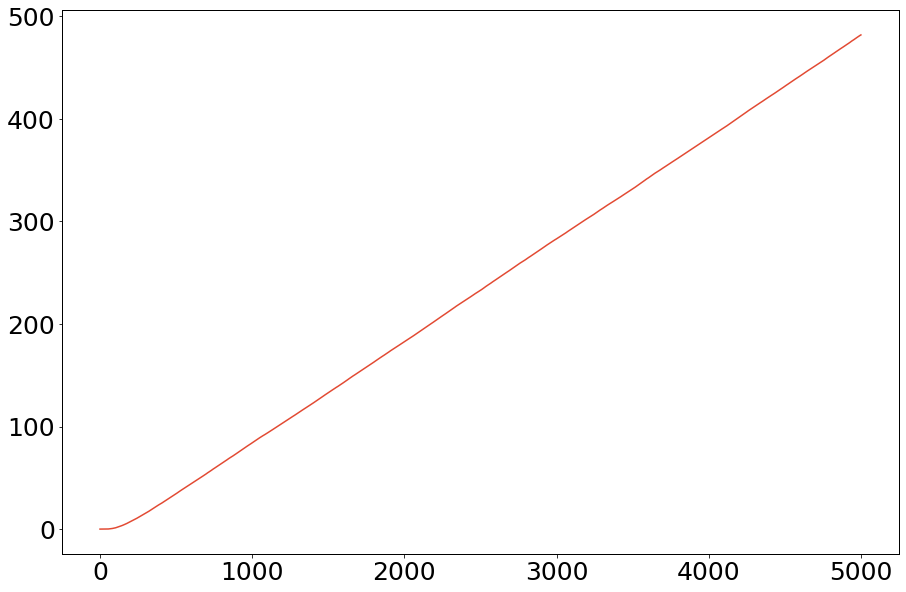

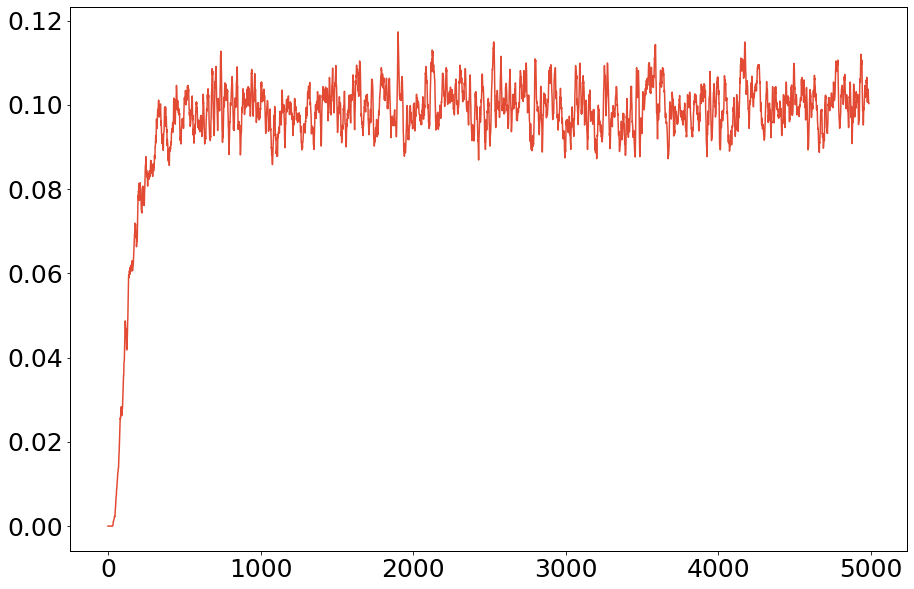

In [23]:
numberOfSteps = 5000
sampleSize = 1000
failiar_45 = []
for i in range(sampleSize):
    failiar_45.append(RandomWalker_failiarCounter_p(20, 20, numberOfSteps, 0.45))
failiar_45 = np.mean(failiar_45, axis=0)

deltaStep = 10
acc = [sum(failiar_45[:i + 1]) for i in range(numberOfSteps)]
plt.plot([i for i in range(numberOfSteps)], acc)
plt.show()

acc = acc + [0 for i in range(deltaStep)]
acc_fail_rate = [((acc[i] - acc[i - deltaStep]) / deltaStep) for i in range(0, numberOfSteps - deltaStep)]
plt.plot([i for i in range(numberOfSteps - deltaStep)], acc_fail_rate)
plt.show()

In [23]:
sampleSize = 100
stepList_fixStepSize = []
# stepList_varStepSize = []
# stepList_varStepsize_powerlaw = []
for i in range(sampleSize):
    stepList_fixStepSize.append(RandomWalker_fixStepSize(2000, 2000))
    # stepList_varStepSize.append(RandomWalker_varStepSize(20, 20))
    # stepList_varStepsize_powerlaw.append(RandomWalker_varStepSize_powerLaw(500, 500))



0.17133032958778394
0.43215686962770977


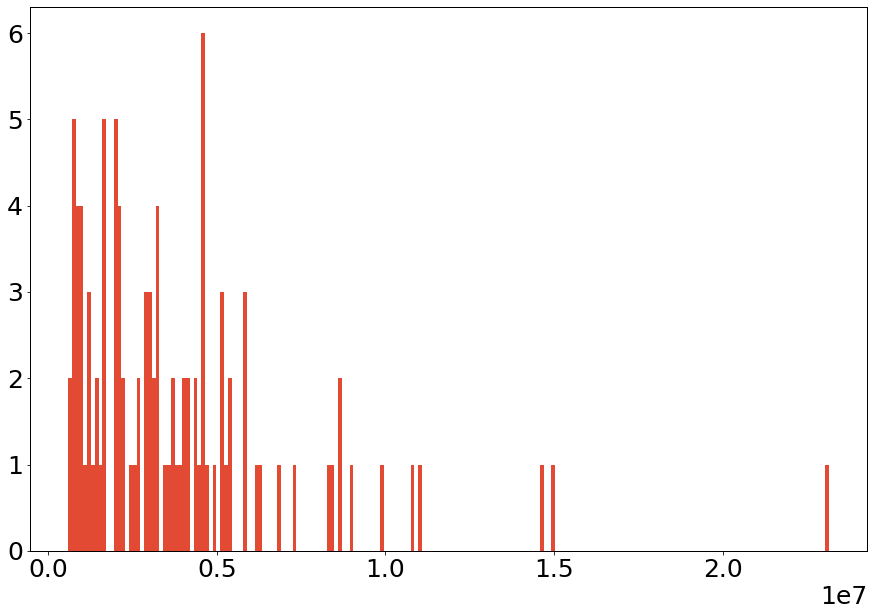

In [25]:
pred = 4000000
t = (pred - np.average(stepList_fixStepSize)) / np.sqrt(np.var(stepList_fixStepSize) / sampleSize)
print(t)
print(st.t.sf(np.abs(t), sampleSize - 1))
plt.hist(stepList_fixStepSize, bins=200)
plt.show()

0.36266680011550445
0.3584652578704818


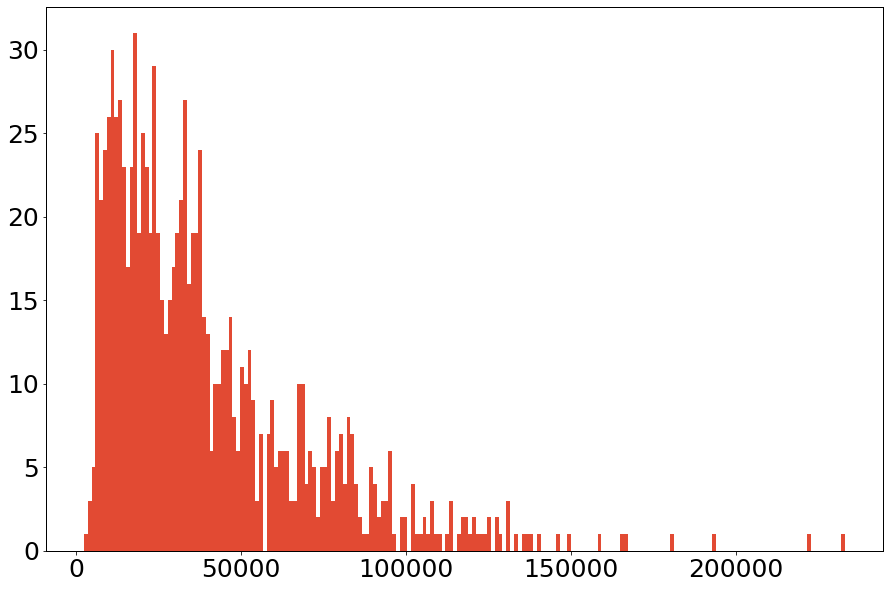

In [26]:
sampleSize = 1000
stepList_fixStepSize = []
for i in range(sampleSize):
    stepList_fixStepSize.append(RandomWalker_fixStepSize(200, 200))

pred = 40000
t = (pred - np.average(stepList_fixStepSize)) / np.sqrt(np.var(stepList_fixStepSize) / sampleSize)
print(t)
print(st.t.sf(np.abs(t), sampleSize - 1))
plt.hist(stepList_fixStepSize, bins=200)
plt.show()

-0.249411933266328
0.4015424376934834


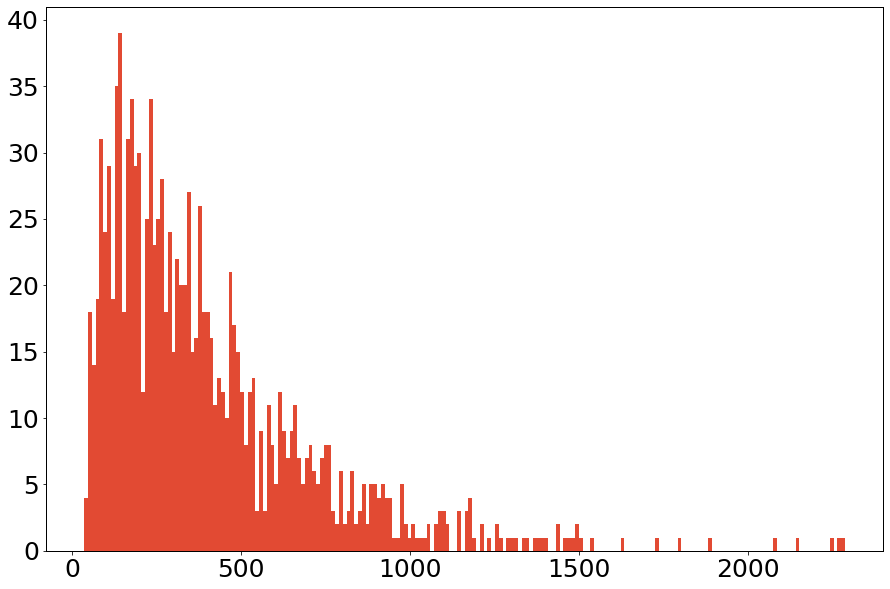

In [7]:
sampleSize = 1200
stepList_fixStepSize = []
for i in range(sampleSize):
    stepList_fixStepSize.append(RandomWalker_fixStepSize(20, 20))

pred = 400
t = (pred - np.average(stepList_fixStepSize)) / np.sqrt(np.var(stepList_fixStepSize) / sampleSize)
print(t)
print(st.t.sf(np.abs(t), sampleSize - 1))
plt.hist(stepList_fixStepSize, bins=200)
plt.show()

In [110]:
print(np.mean(stepList_fixStepSize))
# print(np.median(stepList_fixStepSize))
print(np.std(stepList_fixStepSize))
# print(len(stepList_fixStepSize), len(stepList_varStepSize))
# print(np.mean(stepList_varStepSize))
# print(np.std(stepList_varStepSize))
print(np.mean(stepList_varStepsize_powerlaw))
print(np.std(stepList_varStepsize_powerlaw))

241082.66
185135.07732032955
71287.59
55412.81470690602


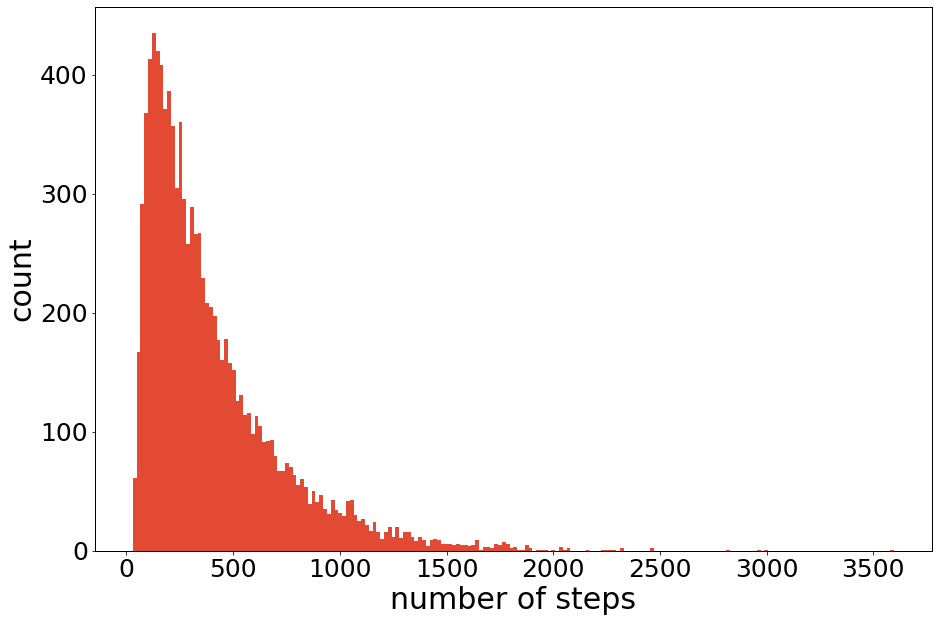

In [10]:
plt.hist(stepList_fixStepSize, bins=200)
plt.xlabel('number of steps')
plt.ylabel('count')
plt.show()

# plt.hist(stepList_varStepSize, bins=200)
# plt.xlabel('number of steps')
# plt.ylabel('frequency')
# plt.show()

# plt.hist(stepList_varStepsize_powerlaw, bins=200)
# plt.xlabel('number of steps')
# plt.ylabel('frequency')
# plt.show()

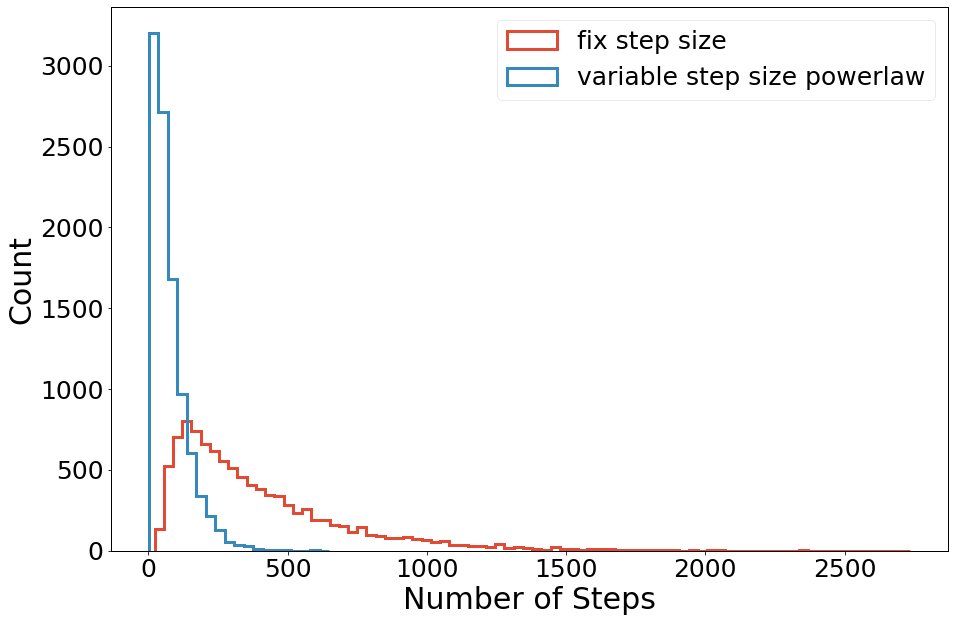

In [89]:
plt.hist(stepList_fixStepSize, bins= int(0.03 * np.max(stepList_fixStepSize)), histtype='step', linewidth = 3, label = "fix step size")
# plt.hist(stepList_varStepSize, bins= int(0.03 * np.max(stepList_varStepSize)), histtype='step', linewidth = 3, label = "variable step size")
plt.hist(stepList_varStepsize_powerlaw, bins= int(0.03 * np.max(stepList_varStepsize_powerlaw)), histtype='step', linewidth = 3, label = "variable step size powerlaw")
plt.legend()
plt.xlabel('Number of Steps')
plt.ylabel('Count')
plt.show()